In [1]:
import random
from datetime import timedelta

import pandas as pd

import dateutil
parse_date = lambda s: dateutil.parser.parse(s).date()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
data_dir = 'train_2_linear_1.0_1226457454_2017-07-08_2017-07-11_2017-09-10'
model_name = 'rnn_v1_30_3_2_selu_0.5_smape_0.001_3'

In [3]:
data = pd.read_csv('../input/train_3.csv'.format(data_dir, model_name))
data = pd.melt(data, id_vars='Page', var_name='Date', value_name='Views')
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Page,Date,Views
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN


In [4]:
predictions = pd.read_csv('../output/predictions/{}/{}.csv'.format(data_dir, model_name))
predictions['Date'] = pd.to_datetime(predictions['Date'])
predictions.head()

,Page,Date,Prediction
0,!vote_en.wikipedia.org_all-access_all-agents,2017-07-11,8.0
1,!vote_en.wikipedia.org_all-access_all-agents,2017-07-12,11.0
2,!vote_en.wikipedia.org_all-access_all-agents,2017-07-13,8.0
3,!vote_en.wikipedia.org_all-access_all-agents,2017-07-14,11.0
4,!vote_en.wikipedia.org_all-access_all-agents,2017-07-15,8.0


In [5]:
pages = list(set(predictions['Page'].unique()))

from_date, to_date = data_dir.split('_')[-2:]
from_date = parse_date(from_date)
to_date = parse_date(to_date)

In [194]:
# page = random.choice(pages)
# page = 'Robert_De_Niro_en.wikipedia.org_mobile-web_all-agents'
# page = 'Ender’s_Game_–_Das_große_Spiel_de.wikipedia.org_all-access_spider'
# page = 'Xenia_Prinzessin_von_Sachsen_de.wikipedia.org_all-access_all-agents'
page = 'América_Latina_es.wikipedia.org_desktop_all-agents'

In [195]:
page_data = data[data['Page'] == page]
page_data = page_data[page_data['Date'] >= from_date - timedelta(days=365)]

page_predictions = predictions [predictions['Page'] == page]

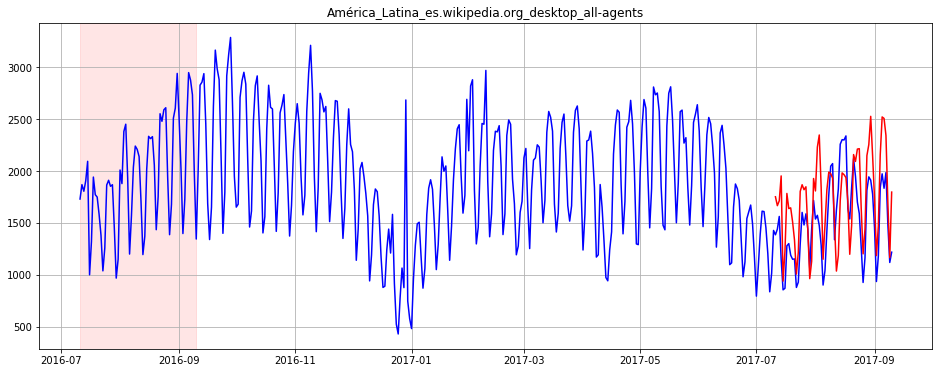

In [196]:
plt.figure(figsize=(16, 6))
plt.plot(page_data['Date'], page_data['Views'], color='blue')
region = [from_date - timedelta(days=365), to_date - timedelta(days=365)]
plt.axvspan(*mdates.date2num(region), color='red', alpha=0.1)
plt.plot(page_predictions['Date'], page_predictions['Prediction'], color='red')
plt.title(page)
plt.grid()

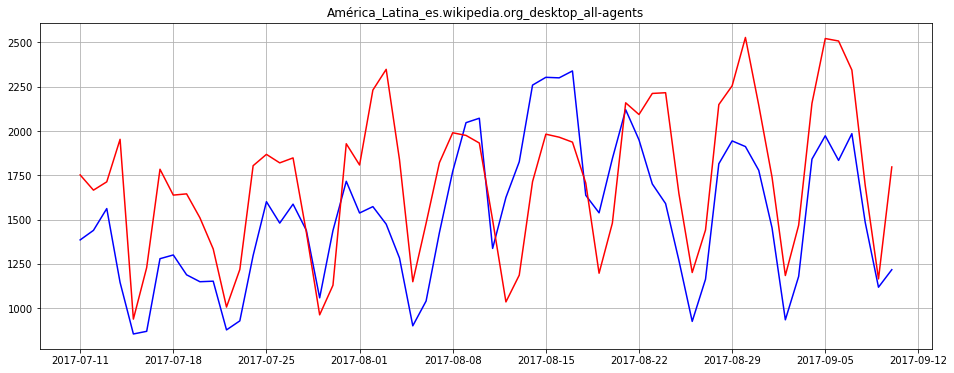

In [197]:
plt.figure(figsize=(16, 6))
df = page_data[page_data['Date'] >= from_date]
plt.plot(df['Date'], df['Views'], color='blue')
df = page_predictions[page_predictions['Date'] >= from_date]
plt.plot(page_predictions['Date'], page_predictions['Prediction'], color='red')
plt.title(page)
plt.grid()